# Load Forecasting

blablabla

We're using Building 7 as a reference for this (large commercial, >50,000 ppl)

**Sources:**
https://openei.org/datasets/dataset/consumption-outdoor-air-temperature-11-commercial-buildings

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

df = pd.read_csv('./data/building60preoffice.csv')
df.head()
df.shape

(8735, 3)

In [69]:
# Set Date as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(pd.DatetimeIndex(df['Date']))

df['hour'] = df['Date'].dt.hour

df.head()

,Date,OAT,Building 6 kW,hour
Date,,,,
2009-01-02 00:00:00,2009-01-02 00:00:00,41.6,23.3,0
2009-01-02 01:00:00,2009-01-02 01:00:00,40.9,23.1,1
2009-01-02 02:00:00,2009-01-02 02:00:00,39.5,23.7,2
2009-01-02 03:00:00,2009-01-02 03:00:00,36.3,29.1,3
2009-01-02 04:00:00,2009-01-02 04:00:00,32.8,35.6,4


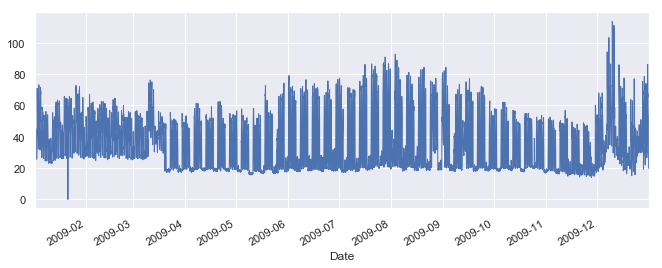

In [70]:
sns.set(rc={'figure.figsize':(11, 4)})

df['Building 6 kW'].plot(linewidth=1)

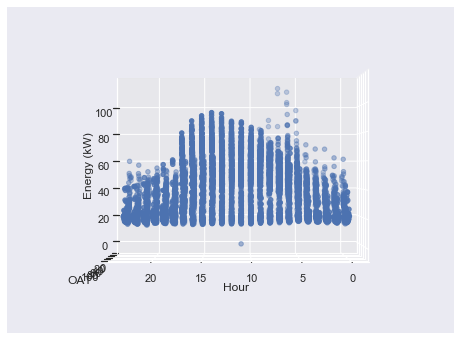

In [71]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")

# z_line = np.linspace(0, 15, 1000)
# x_line = np.cos(z_line)
# y_line = np.sin(z_line)
# ax.plot3D(x_line, y_line, z_line, 'gray')

xs = df['hour']
ys = df['OAT']
zs = df['Building 6 kW']
# ax.scatter3D(xs, ys, zs, c=ys, cmap='hsv');
ax.scatter3D(xs, ys, zs);
ax.view_init(0, 90)

# ax.plot_wireframe(xs, ys, zs, rstride=5, cstride=5)

ax.set_xlabel('Hour')
ax.set_ylabel('OAT')
ax.set_zlabel('Energy (kW)')

plt.show()

# rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [72]:
df.shape

(8735, 4)

In [73]:
from sklearn.linear_model import SGDClassifier
X = [df['hour'], df['OAT']]
y = df['Building 6 kW']
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=6)
clf.fit(X, y)

C:\Users\nickb\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [2, 8735]

In [ ]:
clf.predict([13],[35])